Train Epoch: 1 [0/60000 (0%)]	Loss: 2.289216
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.270977
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.083191
Train Epoch: 1 [1920/60000 (3%)]	Loss: 1.918180
Train Epoch: 1 [2560/60000 (4%)]	Loss: 1.730147
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.580783
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.204538
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.941652
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.096050
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.095540
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.000289
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.853093
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.946354
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.740725
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.677013
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.886457
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.958147
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.636793
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.879380
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.866511
Train Epoch: 1 [12800/60000 (

E:\anaconda3\envs\Pytorch_e\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26177 (\N{CJK UNIFIED IDEOGRAPH-6641}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\anaconda3\envs\Pytorch_e\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23439 (\N{CJK UNIFIED IDEOGRAPH-5B8F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\anaconda3\envs\Pytorch_e\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31119 (\N{CJK UNIFIED IDEOGRAPH-798F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


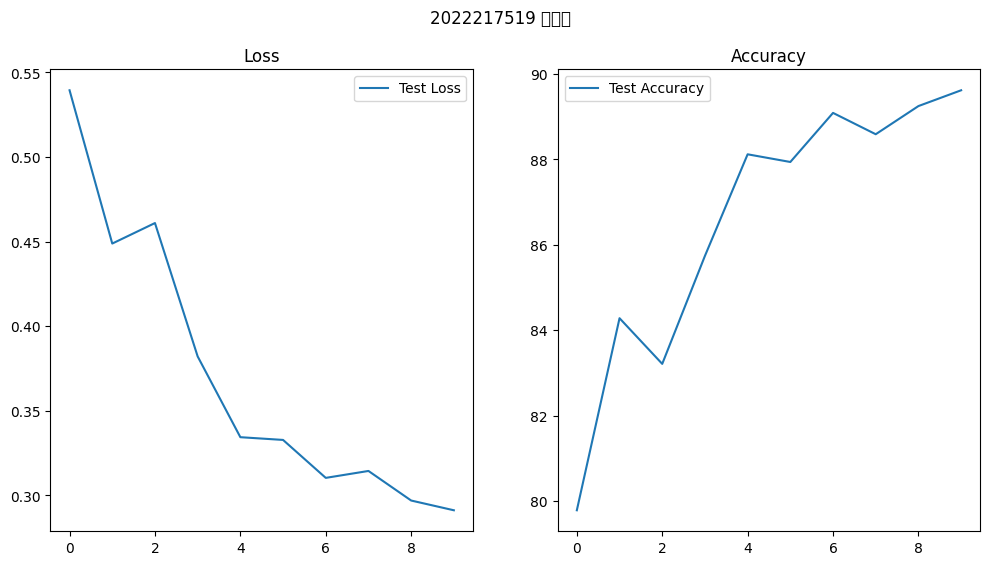

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.281925
Train Epoch: 1 [640/60000 (1%)]	Loss: 0.173113
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.233955
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.253499
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.208947
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.165153
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.190783
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.302567
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.139366
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.200265
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.147428
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.187393
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.221967
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.349514
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.295677
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.177894
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.131209
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.203507
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.296293
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.207198
Train Epoch: 1 [12800/60000 (

TypeError: test() missing 1 required positional argument: 'history'

In [1]:
from __future__ import print_function   # 从future版本导入print函数功能
import argparse                         # 加载处理命令行参数的库
import sys
sys.argv = ['run.py']
import torch                            # 引入相关的包
import torch.nn as nn                   # 指定torch.nn别名nn
import torch.nn.functional as F         # 引用神经网络常用函数包，不具有可学习的参数
import torch.optim as optim
from torchvision import datasets, transforms  # 加载pytorch官方提供的dataset
import matplotlib.pyplot as plt

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)  # 1表示输入通道，20表示输出通道，5表示conv核大小，1表示conv步长
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4 * 4 * 50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4 * 4 * 50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


def train(args, model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % args.log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader), loss.item()))


def test(args, model, device, test_loader, history):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    history['test_loss'].append(test_loss)
    history['test_accuracy'].append(test_accuracy)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset), test_accuracy))

def plot_history(history):
    plt.figure(figsize=(12, 6))
    plt.suptitle('2022217519 晁宏福')  # 添加标题

    plt.subplot(1, 2, 1)
    plt.plot(history['test_loss'], label='Test Loss')
    plt.title('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['test_accuracy'], label='Test Accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.show()


def main():
    # Training settings
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--batch-size', type=int, default=64, metavar='N',
                        help='input batch size for training (default: 64)')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--epochs', type=int, default=10, metavar='N',
                        help='number of epochs to train (default: 10)')
    parser.add_argument('--lr', type=float, default=0.01, metavar='LR',
                        help='learning rate (default: 0.01)')
    parser.add_argument('--momentum', type=float, default=0.5, metavar='M',
                        help='SGD momentum (default: 0.5)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')
    parser.add_argument('--seed', type=int, default=1, metavar='S',
                        help='random seed (default: 1)')
    parser.add_argument('--log-interval', type=int, default=10, metavar='N',
                        help='how many batches to wait before logging training status')

    parser.add_argument('--save-model', action='store_true', default=False,
                        help='For Saving the current Model')
    args = parser.parse_args()
    use_cuda = not args.no_cuda and torch.cuda.is_available()

    torch.manual_seed(args.seed)

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(
        datasets.FashionMNIST('./fashionmnist_data/', train=True, download=False,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=args.batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(
        datasets.FashionMNIST('./fashionmnist_data/', train=False, transform=transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))
        ])),
        batch_size=args.test_batch_size, shuffle=True, **kwargs)

    model = Net().to(device)
    optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)
    history = {'test_loss': [], 'test_accuracy': []}

    for epoch in range(1, args.epochs + 1):
        train(args, model, device, train_loader, optimizer, epoch)
        test(args, model, device, test_loader, history)

    plot_history(history)
    scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[12, 24], gamma=0.1)

    for epoch in range(1, args.epochs + 1):
        train(args, model, device, train_loader, optimizer, epoch)
        test(args, model, device, test_loader)

    if (args.save_model):
        torch.save(model.state_dict(), "mnist_cnn.pt")


# 当.py文件直接运行时，该语句及以下的代码被执行，当.py被调用时，该语句及以下的代码不被执行
if __name__ == '__main__':
    main()

系统流程
1. 命令行参数解析：使用 `argparse` 解析命令行参数，设置训练和测试的配置。
2. 数据加载：使用 `torchvision` 加载 Fashion-MNIST 数据集，并进行必要的预处理。
3. 模型定义：定义一个 CNN 模型，包括卷积层、全连接层等。
4. 模型训练：使用 SGD 优化器和 NLLLoss 损失函数训练模型，并记录训练过程中的损失和准确率。
5. 模型测试：在测试集上评估模型的性能，并记录测试过程中的损失和准确率。
6. 模型评估：使用 matplotlib 绘制训练和测试过程中的损失和准确率曲线，以可视化模型的学习过程。
7. 模型保存：如果命令行参数中设置了保存模型，则保存训练好的模型。
具体流程
1. 命令行参数解析：
   使用 `argparse` 创建一个参数解析器。添加必要的参数，如 batch size、学习率、是否使用 CUDA 等。解析命令行参数，获取配置信息。

2. 数据加载：
使用 `torchvision.datasets.FashionMNIST` 加载数据集。对数据进行预处理，包括转换为张量和归一化。使用 `torch.utils.data.DataLoader` 创建数据加载器，设置批量大小和是否随机打乱。

3. 模型定义：
   定义一个继承自 `nn.Module` 的 CNN 模型。在`__init__`方法中定义网络结构，包括两个卷积层和两个全连接层。 在`forward`方法中定义前向传播逻辑，包括卷积、激活、池化和全连接操作。

4. 模型训练：
   将模型设置为训练模式。遍历训练数据加载器，对每个批次的数据进行以下操作：将数据和目标转移到指定的设备。清零梯度。前向传播计算输出。计算损失。 反向传播计算梯度。更新模型参数。计算并记录训练损失和准确率。每 `args.log_interval` 个批次打印一次训练状态。

5. 模型测试：
  将模型设置为评估模式。遍历测试数据加载器，对每个批次的数据进行以下操作：将数据和目标转移到指定的设备。前向传播计算输出。计算损失和准确率。记录测试损失和准确率。打印测试集的平均损失和准确率。

6. 模型评估：
使用 matplotlib 绘制训练和测试过程中的损失和准确率曲线。通过可视化曲线，分析模型的学习过程和性能。

总结
系统实现了一个完整的机器学习流程，从数据加载、模型定义、训练、测试到模型评估和保存。通过命令行参数，可以灵活地调整训练过程，而可视化工具则直观地理解模型的学习情况。